In [0]:
#importing the header files 

import pickle
import numpy as np
from matplotlib import pyplot as plt
import matplotlib.cm as cm
import keras
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D,BatchNormalization
from keras import regularizers
import pandas as pd

In [39]:
# since the code is written in google colab so 
from google.colab import files
files.upload()

{}

In [40]:
# for viewing the files in the colab notebook
!ls

Himani_Negi.csv  sample_data  test_image.pkl  train_image.pkl  train_label.pkl


In [0]:

##loading the train image dataset
with open('train_image.pkl', 'rb') as f:
    train_data = pickle.load(f)
    f.close()

In [42]:
type(train_data)
train_data=np.array(train_data)
train_data.shape

(8000, 784)

In [0]:
x=train_data
x=x.reshape(-1,28,28,1)

In [44]:
x.shape

(8000, 28, 28, 1)

In [0]:
#loading the testing image datatset
with open('test_image.pkl', 'rb') as f:
    test_data = pickle.load(f)
    f.close()

In [46]:
type(test_data)
test_data=np.array(test_data)
test_data.shape

(2000, 784)

In [47]:
#test_data
test_data=test_data.reshape(-1,28,28,1)
test_data.shape

(2000, 28, 28, 1)

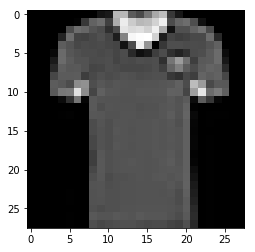

In [48]:
#showing the testing/training image
first_image = test_data[3]
first_image = first_image.reshape((28,28))
plt.imshow(first_image,cmap=cm.Greys_r)
plt.show()


In [0]:
with open('train_label.pkl', 'rb') as f:
    train_y = pickle.load(f)
    f.close()

In [50]:
train_y=np.array(train_y)
train_y=train_y.reshape(-1,1)
train_y.shape,np.unique(train_y)

((8000, 1), array([0, 2, 3, 6]))

In [51]:
# converting the labels in the onne-hot encoded form as needed by the neural network

from sklearn.preprocessing import OneHotEncoder
obj=OneHotEncoder()
y=obj.fit_transform(train_y).toarray()

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_encoders.py:371: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


In [0]:
y.shape
num_classes=4

In [0]:
# splitting the data into test train split 
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=42)

In [54]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((5600, 28, 28, 1), (2400, 28, 28, 1), (5600, 4), (2400, 4))

making the model architecture ---adding the convs layer for the images  , activation fucntion as relu
batch_normalization and dropout for not to overfit the data 
flatten layer to  make it ready for  the dense layers 
and then at the end a output dense layer having units equal to the number of  the classes 

In [ ]:


model = Sequential()
model.add(Conv2D(32, (3, 3), padding='same',
                 input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(BatchNormalization())

#model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.30))


model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(BatchNormalization())

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.30))


model.add(Conv2D(128, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(BatchNormalization())

model.add(Conv2D(128, (3, 3)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.40))


model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes))
model.add(Activation('softmax'))

In [57]:
#compiling the model
model.compile(loss='categorical_crossentropy',
              optimizer='Adam',
              metrics=['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
activation_9 (Activation)    (None, 28, 28, 32)        0         
_________________________________________________________________
batch_normalization_7 (Batch (None, 28, 28, 32)        128       
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 26, 26, 32)        9248      
_________________________________________________________________
activation_10 (Activation)   (None, 26, 26, 32)        0         
_________________________________________________________________
batch_normalization_8 (Batch (None, 26, 26, 32)        128       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 13, 13, 32)        0         
__________

In [58]:
# running the model and deciding thee epochs , batch size 

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
batch_size=32
epochs=20
model.fit(x_train, y_train,
              batch_size=batch_size,
              epochs=epochs,
              validation_data=(x_test, y_test),
              shuffle=True)

Train on 5600 samples, validate on 2400 samples
Epoch 1/20
5600/5600 [==============================] - 6s 1ms/step - loss: 0.9348 - acc: 0.6262 - val_loss: 0.5822 - val_acc: 0.7525
Epoch 2/20
5600/5600 [==============================] - 4s 735us/step - loss: 0.6143 - acc: 0.7557 - val_loss: 0.5250 - val_acc: 0.7887
Epoch 3/20
5600/5600 [==============================] - 4s 718us/step - loss: 0.5176 - acc: 0.7921 - val_loss: 0.4588 - val_acc: 0.8187
Epoch 4/20
5600/5600 [==============================] - 4s 705us/step - loss: 0.4655 - acc: 0.8195 - val_loss: 0.4558 - val_acc: 0.8217
Epoch 5/20
5600/5600 [==============================] - 4s 702us/step - loss: 0.4320 - acc: 0.8313 - val_loss: 0.4409 - val_acc: 0.8267
Epoch 6/20
5600/5600 [==============================] - 4s 693us/step - loss: 0.3966 - acc: 0.8486 - val_loss: 0.3914 - val_acc: 0.8471
Epoch 7/20
5600/5600 [==============================] - 4s 694us/step - loss: 0.3801 - acc: 0.8555 - val_loss: 0.3739 - val_acc: 0.8546
Ep

In [59]:
# evaluating the model
scores = model.evaluate(x_test, y_test, verbose=1)
scores

2400/2400 [==============================] - 0s 159us/step


[0.3699813744922479, 0.865]

In [0]:
from keras.utils.vis_utils import plot_model
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [0]:
# predicting the classes for the test_data
y_pred=model.predict_classes(test_data, batch_size=None, verbose=0)

In [61]:
y_pred.shape

(2000,)

In [66]:
b = np.array([i for i in range(0,2000)])
b.shape


(2000,)

In [81]:
# making a pandas dataframe consisting of the image index and the class label 
dataset = pd.DataFrame({'image_index':b,'class':y_pred},columns=['image_index','class'])
dataset.head()

,image_index,class
0,0,0
1,1,0
2,2,0
3,3,0
4,4,0


In [0]:
#converting the dataset to the csv 
dataset.to_csv("Himani_Negi.csv", index=False)

In [0]:
# downloading the dataset
files.download('Himani_Negi.csv')

In [68]:
!ls

Himani_Negi.csv  sample_data	 train_image.pkl
model_plot.png	 test_image.pkl  train_label.pkl


In [1]:
#coonvertint to one hot encoded form to feed  it in the neural network